# **Multi-Index**

In [2]:
import numpy as np
import pandas as pd

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [2]:
# can we have multiple index? Let's try
# ans is YES
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [3]:
# The problem?
a['cse']

KeyError: 'cse'

In [4]:
# The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index

In [18]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]]) #cartesian product

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [21]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)

In [12]:
# a logical question to ask

In [40]:
# unstack--> convert multiindex data into data frame or row-->column
temp = s.unstack()
temp

2019  2020  2021  2022
cse     1     2     3     4
ece     5     6     7     8

In [41]:
# stack--> to again go in multiindex or original position by columns-->rows 
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [31]:
# Then what was the point of multiindex series?
# see.. through multiindex we can reduce the higher
# dimension data into lower dimension

In [29]:
# multiindex dataframe

In [42]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [58]:
branch_df1.unstack()['avg_package'][2019]['cse']

1

In [39]:
branch_df1['students']['cse'][2019]

2

In [40]:
# Are columns really different from index?
# no pandas treat columns and index same

In [59]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [60]:
branch_df2['delhi']

avg_package  students
2019            1         2
2020            3         4
2021            5         6
2022            7         8

In [61]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [55]:
# dimension of this branch_df3 
# is 4d
# because you have to give 4 pieces of information to fetch specific value
# eg. want to avg_pakage in delhi branch(cse) year(2019)
# code follows => branch_df3.loc['cse']['delhi']['avg_package'][2019]

In [62]:
branch_df3.loc['cse']['delhi']['avg_package'][2019]

1

### Stacking and Unstacking
- under stacking , we come from column to row 
- under unstack , we come from row to column

In [76]:
#timestamp -- 55:00
#double unstack() make this a series
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [78]:
#original df
branch_df3.unstack().stack()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [58]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

In [59]:
### Working with multiindex dataframes

In [68]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [86]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

avg_package  students
cse 2019            1         2
    2021            5         6
ece 2019            9        10

In [97]:
# multiple
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [96]:
# using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [65]:
# Extracting cols
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [66]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [105]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

delhi      mumbai
         students avg_package
cse 2019        2           0
ece 2019       10           0

In [108]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(level=0,ascending=[False])#level=0 means on 'branch'

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [109]:
# multiindex dataframe(col) -> transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [113]:
# swaplevel
# interchanging the position of two index
# level = index
branch_df3.swaplevel(axis=1)#here axis = 0 ---> rows ,axis=1--> cols

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
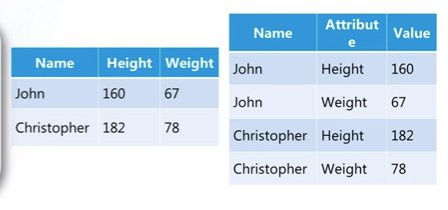

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [1]:
# melt -> simple example branch
# wide to long
import pandas as pd
pd.DataFrame({'cse':[120]}).melt()

variable  value
0      cse    120

In [2]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

branch  num_students
0    cse           120
1    ece           100
2   mech            50

In [3]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')
#means aap branch ko row nhi banana chahta

branch  year  students
0    cse  2020       100
1    ece  2020       150
2   mech  2020        60
3    cse  2021       120
4    ece  2021       130
5   mech  2021        80
6    cse  2022       150
7    ece  2022       140
8   mech  2022        70

In [4]:
# melt -> real world example
# both the datas in wide format
death = pd.read_csv('time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [5]:
death=death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Confirmed_Cases')

In [8]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','Date'])[['Country/Region','Date','Confirmed_Cases','Deaths']]

Country/Region     Date  Confirmed_Cases  Deaths
0                Afghanistan  1/22/20                0       0
1                    Albania  1/22/20                0       0
2                    Algeria  1/22/20                0       0
3                    Andorra  1/22/20                0       0
4                     Angola  1/22/20                0       0
...                      ...      ...              ...     ...
311248    West Bank and Gaza   1/2/23           703228    5708
311249  Winter Olympics 2022   1/2/23              535       0
311250                 Yemen   1/2/23            11945    2159
311251                Zambia   1/2/23           334661    4024
311252              Zimbabwe   1/2/23           259981    5637

[311253 rows x 4 columns]